# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [2]:
def read_subject_info():
    '''
    This function returns a list of headers of subject_info.txt file, whose data type is string,
    and returns an array containing the numerical information of subject_info.txt file
    The third column of the array which contains height data is given in metres.
    '''
    import numpy as np
    # open the file and name it "f"
    f = open("/Users/shenyichen/Desktop/CMF/Python programming/pp-project-1-Yichen575/dataset/subject_info.txt","r")
    # read the first line of the file
    headers = f.readline().rstrip('\n').split(',') 
    
    # since we have read the first line, the readlines() will continue to read all the following lines 
    # it returns a list of lines containing numerical information, the data type is string
    data_lines = f.readlines() 

    # create an initial array with the shape wanted to be modified later
    info = np.ones(shape=(10, 4)) 
    # set a initial index number referring to the row that is modified in array
    i = 0

    for line in data_lines:
        # get rid of "\n" at the end of each line, and split each line into list of strings
        row_value = line.rstrip('\n').split(',') 

        # convert the datatype of value from strings into integers
        row_value = [int(val) for val in row_value] 

        # modify the height into metres
        row_value[2] = 0.01 * row_value[2] 

        # convert list to array
        row_value = np.asarray(row_value) 
        
        # assign the value of array to each row of the initial aray, ie. the (i+1)-th row of wanted array
        info[i] = row_value
        i += 1 # for the next loop, we want to assign value to the next row, so we increase i by 1
    f.close() # close the file
    return headers, info



In [3]:
# test example
read_subject_info()


(['Subject', 'Weight', 'Height', 'Age'],
 array([[  1.  ,  95.  ,   1.83,  27.  ],
        [  2.  ,  80.  ,   1.96,  25.  ],
        [  3.  ,  62.  ,   1.78,  27.  ],
        [  4.  ,  65.  ,   1.83,  25.  ],
        [  5.  ,  74.  ,   1.84,  40.  ],
        [  6.  ,  70.  ,   1.75,  20.  ],
        [  7.  , 115.  ,   1.86,  27.  ],
        [  8.  ,  80.  ,   1.8 ,  24.  ],
        [  9.  ,  70.  ,   1.75,  29.  ],
        [ 10.  ,  92.  ,   2.05,  32.  ]]))

---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

In [4]:
def bmi_chart(info):
    """ 
    This function takes as input an array returned by previous function read_subject_info().
    It generates a graph presenting all subjects' heights and weights.
    Whether they are within the healthy range is indicated on the graph.
    """
    
    import numpy as np
    %matplotlib inline
    import matplotlib.pyplot as plt
    from cProfile import label
    
    # info contains all the numerical information wanted


    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()

    # plot weight against subject using red dotted line
    ax.plot(info[:,0],info[:,1],'r-.')
    # set x-axis label Subject
    ax.set_xlabel("Subject")
    # set y-axis label weight(kg)
    ax.set_ylabel("Weight(kg)", color="red")

    # Create a twin Axes sharing the xaxis, named ax2
    ax2=ax.twinx()

    # plot height against subject using blue line and marker x
    ax2.plot(info[:,0],info[:,2],'b-x')
    # set y-axis label
    ax2.set_ylabel("Height(meters)", color="blue")

    unhealthy_sub = [] # empty list to store unhealthy subject
    unhealthy_w = [] # empty list to store unhealthy weight
    healthy_sub = [] # empty list to store healthy subject
    healthy_w = [] # empty list to store healthy weight

    # calculate the bmi for each subject, the results are in an array
    bmi_array = info[:,1]/info[:,2]**2 

    # categorize the subject according to their bmi
    for i in range(len(bmi_array)):
        if (bmi_array[i] < 18.5) or (bmi_array[i] > 24.9): # if the bmi is not within the heathy range
            unhealthy_sub.append(info[i,0]) # add the unhealthy subject and unhealthy weight into unhealthy list
            unhealthy_w.append(info[i,1]) 
        else: # if the bmi is within the heathy range
            healthy_sub.append(info[i,0]) # add the healthy subject and healthy weight into healthy list
            healthy_w.append(info[i,1])

    # convert all the lists into array in order to plot in next step
    unhealthy_sub = np.asarray(unhealthy_sub)
    unhealthy_w = np.asarray(unhealthy_w)
    healthy_sub = np.asarray(healthy_sub)
    healthy_w = np.asarray(healthy_w)

    # use scatterplot to indicate the healthy weights and unhealthy weights on the graph
    # unhealthy weights are denoted by dark squares
    # healthy weights are denoted by green circles
    ax.scatter(unhealthy_sub,unhealthy_w, color='black', marker='s', label='unhealthy weights')
    ax.scatter(healthy_sub,healthy_w, color='green', marker='o', label='healthy weights')
    ax.legend(loc = 'upper left')





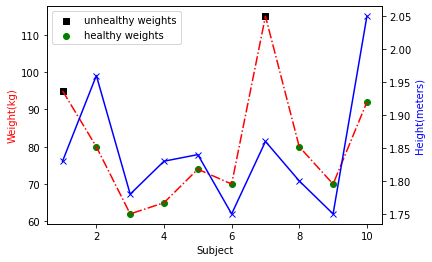

In [5]:
# test example

headers, info = read_subject_info() # call the function read_subject_info() in task1, getting array 'info'

bmi_chart(info) # takes as input the 'info' array returned by function read_subject_info()



---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
seconds: 1814400.0
<class 'numpy.timedelta64'>
days: 21.0
<class 'numpy.float64'>


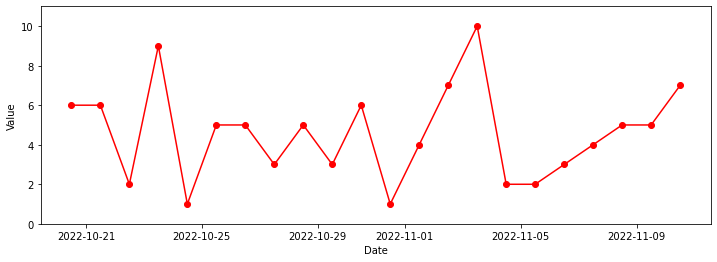

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print('seconds:',seconds_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print('days:',days_elapsed)
print(type(days_elapsed))

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).

**[3 marks]**

In [7]:
def read_heartbeat_data(subject):
    """
    This function takes an integer as input
    opens the corresponding directory and read the file 'heartbeats.txt'
    returns two array, times and intervals, read from the file
    """
    path = "/Users/shenyichen/Desktop/CMF/Python programming/pp-project-1-Yichen575/dataset/subject_" + str(subject)
    f = open(path+'/heartbeats.txt','r') # open the file
    # read the text file excluding the header
    data_lines = f.readlines() [1:] 
    # create empty list to be further added with times read from file
    times = [] 
    # create empty list to be further added with hearbeats intervals read from file
    intervals = [] 
    for line in data_lines:
        # get rid of "\n" at the end of each line, and split each line into list of strings
        row_value = line.rstrip('\n').split(',') 
        # append times read from file
        times.append(row_value[1])
        #append hearbeats intervals read from file
        intervals.append(row_value[2]) 
    times = np.array(times, dtype='datetime64') # convert list into numpy array with dtype='datetime64'
    intervals = np.asarray(intervals, dtype='float') # convert list into numpy array with dtype='float'

    return times, intervals



In [8]:
# test example
read_heartbeat_data(1)

(array(['2022-07-22T10:03:18', '2022-07-22T10:03:19',
        '2022-07-22T10:03:19', ..., '2022-07-23T09:45:07',
        '2022-07-23T09:45:07', '2022-07-23T09:45:07'],
       dtype='datetime64[s]'),
 array([6.512, 0.453, 0.374, ..., 0.342, 0.327, 0.269]))

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [9]:
def hr_from_intervals(intervals):
    """
    This function takes intervals returned by read_heartbeat_data()
    and calculates heat rates in BPM which is in a form of float array
    """
    hr = 60/intervals 
    # since there are 60s in one minute, so we divide 60 by interval to get bpm
    return hr

In [10]:
# test example

times, intervals = read_heartbeat_data(1)
hr = hr_from_intervals(intervals)

hr

array([  9.21375921, 132.45033113, 160.42780749, ..., 175.43859649,
       183.48623853, 223.04832714])

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [11]:
def clean_data(times_raw, hr_raw, prc_low, prc_high):
    """
    This function removes the outliers from the heart rate according to the required percentiles.
    The input prc_low is the lowest percentile.
    The input prc_high is the highest percentile.

    """
    # Check if the input prc_low and prc_high satisfy the condition 0 <= prc_low < prc_high <= 100
    assert prc_low >= 0,'prc_low shouhld be greater or equal to zero'
    assert prc_low < prc_high, 'prc_high should be greater than prc_low'
    assert prc_high <= 100, 'prc_high should be less than 100'
    # Use numpy function to calculate percentiles
    lowest_hr = np.percentile(hr_raw,prc_low)
    highest_hr = np.percentile(hr_raw,prc_high)
    
    # Create an empty list to be added index at which the element in hr_raw is outside the required percentile
    delete_index = []
    for i in range(len(hr_raw)):
        if hr_raw[i] < lowest_hr or hr_raw[i] > highest_hr :
            delete_index.append(i) # Added index at which the element in hr_raw is outside the required percentile

    delete_index = np.asarray(delete_index, dtype='int') # Convert string list into integer array
    hr = np.delete(hr_raw,delete_index)# Delete these heart rates which are outside the required percentile, which are outliers        
    times = np.delete(times_raw,delete_index)# Delete timestamps corresponding to these delete heart rate outliers
    
    return times, hr
    

In [12]:
# test example
times_raw, intervals = read_heartbeat_data(1)
hr_raw = hr_from_intervals(intervals)
times, hr = clean_data(times_raw, hr_raw, 1, 99)
print(times)
print(hr)
print(type(times))
len(times) == len(hr)


['2022-07-22T10:03:19' '2022-07-22T10:03:19' '2022-07-22T10:03:19' ...
 '2022-07-23T09:45:07' '2022-07-23T09:45:07' '2022-07-23T09:45:07']
[132.45033113 160.42780749 125.52301255 ...  90.63444109 175.43859649
 183.48623853]
<class 'numpy.ndarray'>


True

---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

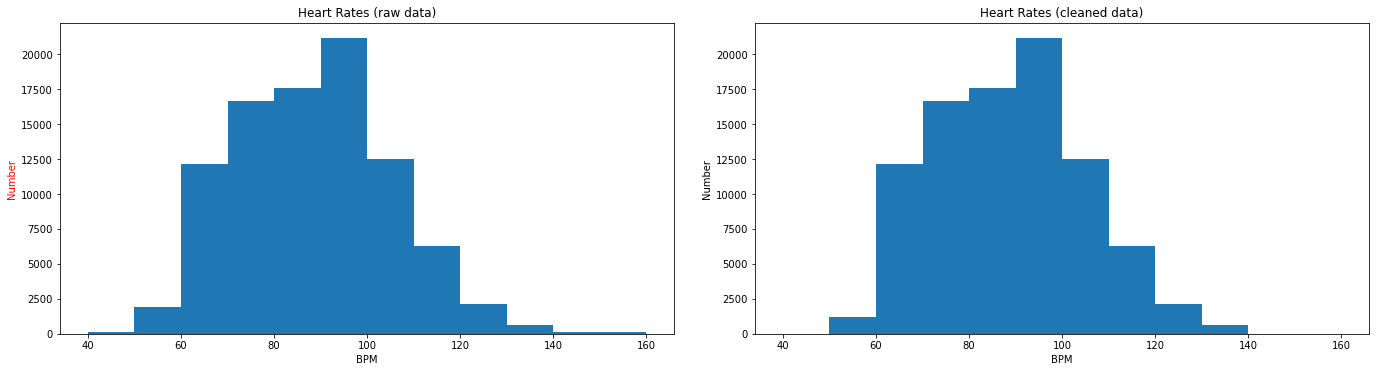

In [13]:

def evaluate_cleaning(subject):
    """ 
    This function takes input an integer from 1 to 10 indicating the subject number
    and plots two histograms of raw heart rate data and cleaned heart rate data
    """
    import matplotlib.pyplot as plt
    %matplotlib inline
    times_raw, intervals = read_heartbeat_data(subject) # calculate times raw data
    hr_raw = hr_from_intervals(intervals) # calclate hr raw data
    prc_low = 1 # bottom 1%
    prc_high = 99 # top 1%, which is bottom 99%
    times, hr = clean_data(times_raw, hr_raw, prc_low, prc_high)

    # create figure and axis objects with subplots()
    fig, axs = plt.subplots(1,2, figsize=(20,6))
    # set the space between two plots
    fig.tight_layout(pad=5.0) 

    # create histogram
    axs[0].hist(hr_raw, bins=list(range(40,170,10)))
    # set x-axis label 'BPM'
    axs[0].set_xlabel("BPM", color="black")
    # set y-axis label 'Number'
    axs[0].set_ylabel("Number", color="red")
    # set the title 'Heart Rates (raw data)'
    axs[0].set_title('Heart Rates (raw data)')

    # create histogram
    axs[1].hist(hr, bins=list(range(40,170,10)))
    # set y-axis label 'Number'
    axs[1].set_ylabel("Number", color="black")
    # set x-axis label 'BPM'
    axs[1].set_xlabel("BPM", color="black")
    # set the title 'Heart Rates (raw data)'
    axs[1].set_title('Heart Rates (cleaned data)')

# use my function to display the histograms of raw and cleaned data for subject 3
evaluate_cleaning(3) 
    

*Use this Markdown cell to write your explanation for Task 4.*

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [14]:
def datetime_to_seconds(times):
    return (times - times[0]) / np.timedelta64(1, 's')

def seconds_to_datetime(seconds_elapsed, start_time):
    return seconds_elapsed * np.timedelta64(1, 's') + start_time


# Demonstrating usage
times = np.array(['2022-10-20 09:19:56','2022-07-21 09:19:57','2022-07-21 09:20:06','2022-07-21 09:20:06','2022-07-21 09:20:06','2022-07-21 09:20:07'], dtype='datetime64[s]')
print(datetime_to_seconds(times))

seconds_elapsed = 70
start_time = np.datetime64('2022-10-20 12:00:00')
print(seconds_to_datetime(seconds_elapsed, start_time))


[       0. -7862399. -7862390. -7862390. -7862390. -7862389.]
2022-10-20T12:01:10


*Use this Markdown cell to explain how the functions `datetime_to_seconds()` and `seconds_to_datetime()` work.*

1. function datetime_to_seconds() takes times which is a datetime64 type array as input, and return a float tytpe array including the seconds elapsed from start time to each timestamp in times array.

2. function seconds_to_datetime() takes a number seconds_elapsed and a datetime64 type variable called start_time, it returns a datetime64 type time at which seconds_elapsed passes from the start time.

---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [15]:

def generate_interpolated_hr(times, hr, time_delta):
    """ 
    This function takes as input the cleaned data returned by function clean_data() 
    and a time interval called time_delta.
    It returns times_interp which is a timestamp array spaced by time_delta and an array hr_interp 
    which contains the corresponding interpolated heart rate values at each timestamps.
    """
    from scipy.interpolate import interp1d
    import math

    # convert the timestamp from datetime64 into seconds
    times_seconds = datetime_to_seconds(times) 
    # interp1d() return a linear interpolation function
    f = interp1d(times_seconds, hr)
    # calculate the number of timesteps, whose size is time_delta = 2
    interp_num = math.ceil((times[-1] - times[0]) / time_delta)
    # create an empty array to modified into times_interp 
    times_interp = np.zeros((interp_num), dtype='datetime64[s]')

    for i in range(interp_num): # calculate each elements of times_interp
        times_interp[i] = time_delta * i + times[0]

    # convert times_interp from datetime64 into seconds
    times_interp_seconds = datetime_to_seconds(times_interp)
    # use the interpolation function to evaluate heart rate at each times in times_interp
    hr_interp = f(times_interp_seconds)
    return times_interp,hr_interp
    

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

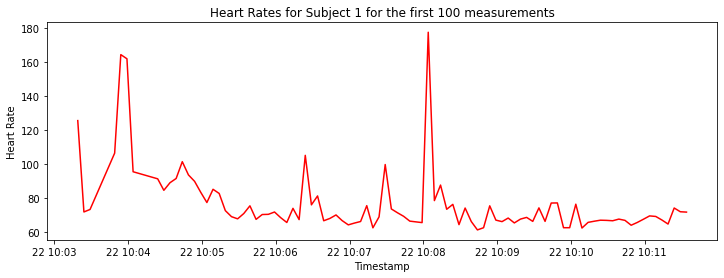

In [16]:
import matplotlib.pyplot as plt
# read the raw data from subject 1
subject = 1
times_raw, intervals = read_heartbeat_data(subject)
# calculate the raw heart rate
hr_raw = hr_from_intervals(intervals)
times, hr = clean_data(times_raw, hr_raw, 1, 99)
time_delta = 5*np.timedelta64(1, 's') # time interval of 5 seconds, in datetime64 type
times_interp,hr_interp = generate_interpolated_hr(times, hr, time_delta)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(times_interp[0:100],hr_interp[0:100],'r-')
ax.set(xlabel='Timestamp', ylabel='Heart Rate')
ax.set_title('Heart Rates for Subject 1 for the first 100 measurements')
plt.show()

*Use this Markdown cell for discussing your interpolation results.*

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [17]:
def rolling_average(times, hr, time_delta, window):
    """ 
    this function calculated rolling average of the heart rate over a given window size
    """

    # calculate the hr_interp using function generate_interpolated_hr()
    times_interp,hr_interp = generate_interpolated_hr(times, hr, time_delta)
    # calculate the number of hr_interp data between the window
    k = int(window/time_delta) + 1
    # calculate the number of rolling average heart rate is going to get, which should be 'k' less than the number of hr_interp
    n = len(hr_interp) - k + 1
    # initialize an array to modify further into the result we want
    hr_rolling = np.zeros(n)

    # start from the first heart rate in hr_interp
    for i in range(n): 
        hr_rolling[i] = sum(hr_interp[i:i+k])/(k) # calculate the rolling average

    return hr_rolling

In [18]:
# test example
window = 30 * np.timedelta64(1, 's')
time_delta = 5 * np.timedelta64(1, 's')
times_raw, intervals = read_heartbeat_data(1)
hr_raw = hr_from_intervals(intervals)
times, hr = clean_data(times_raw, hr_raw, 1, 99)
rolling_average(times, hr, time_delta, window)

array([ 92.33724587,  97.88330957, 110.75853696, ...,  83.06703958,
        82.69099754,  82.91190864])

---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

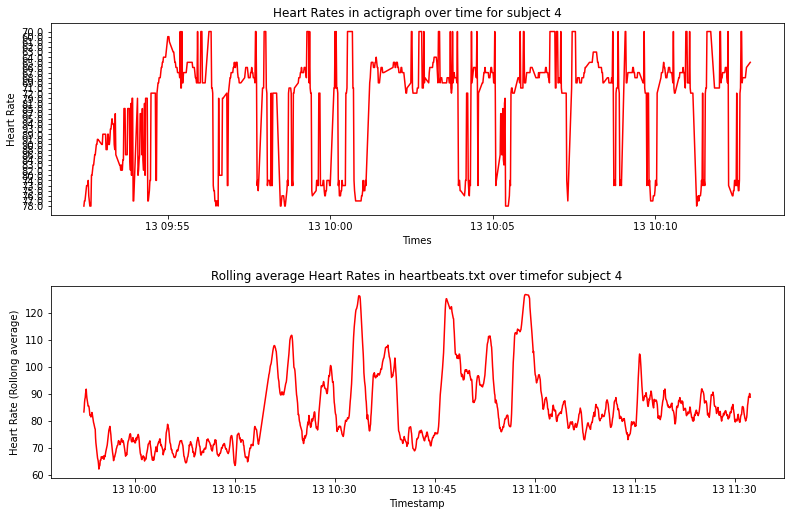

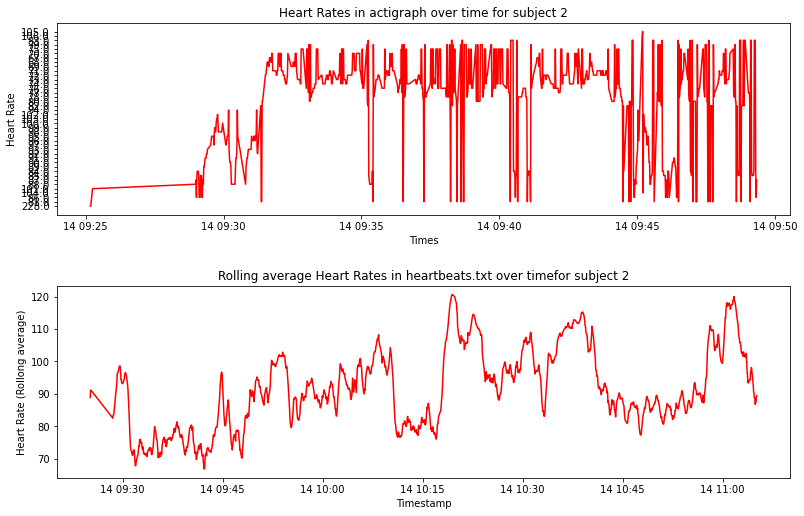

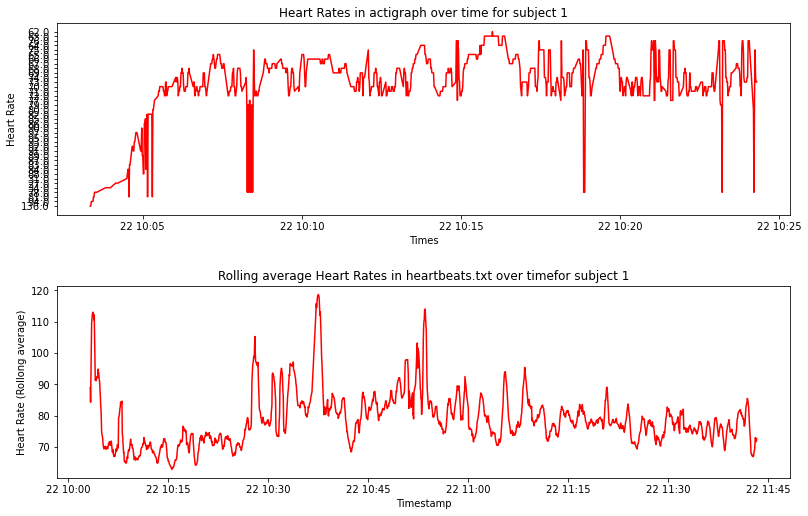

In [19]:
def display_heart_rate(subject):
    """ 
    This function takes as input an integer 'subject' between 1 to 10 an output two plots:
    1. a plot of heart rate data in actigraph.txt over time
    2. a plot of smoothed heart rate data computed from heartbeats.txt over time
    """

    path = "/Users/shenyichen/Desktop/CMF/Python programming/pp-project-1-Yichen575/dataset/subject_" + str(subject)
    f = open(path+'/actigraph.txt','r') # open the file
    # read the text file excluding the header
    data_lines = f.readlines() [1:] 

    # initialize empty array to further modify them
    heart_rate = []
    times_acti = [] 
    for line in data_lines:
        # get rid of "\n" at the end of each line, and split each line into list of strings
        row_value = line.rstrip('\n').split(',') 
        # append times_acti read from file
        times_acti.append(row_value[1])
        # append heart rate read from file
        heart_rate.append(row_value[2])
    heart_rate = np.array(heart_rate)
    times_acti = np.array(times_acti, dtype='datetime64')


    # delta time is 3 seconds
    time_delta = 3*np.timedelta64(1, 's')
    # the window is 30 seconds
    window = 30*np.timedelta64(1, 's')

    # calculate the raw time data and heart rate
    times_raw, intervals = read_heartbeat_data(subject)
    hr_raw = hr_from_intervals(intervals)
    # remove the outliers using clean_data function with
    times, hr = clean_data(times_raw, hr_raw, 1, 99)

    times_interp,hr_interp = generate_interpolated_hr(times, hr, time_delta)
    hr_rolling = rolling_average(times, hr, time_delta, window)
    # calculate the number of hr_interp data between the window
    k = int(window/time_delta)
    # calculate the 
    n = len(hr_interp) - k

    fig, ax = plt.subplots(2,1,figsize=(12, 8))
    # set the space between two plots
    fig.tight_layout(pad=5) 

    ax[0].plot(times_acti[0:1000], heart_rate[0:1000], 'r-')
    ax[0].set(xlabel='Times', ylabel='Heart Rate')
    ax[0].set_title('Heart Rates in actigraph over time for subject '+str(subject))

    ax[1].plot(times_interp[0:2000], hr_rolling[0:2000],'r-')
    ax[1].set(xlabel='Timestamp', ylabel='Heart Rate (Rollong average)')
    ax[1].set_title('Rolling average Heart Rates in heartbeats.txt over timefor subject '+str(subject))
    plt.show()

# 3 examples
display_heart_rate(4)
display_heart_rate(2)
display_heart_rate(1)




---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |

In [20]:
import numpy as np

def read_hr_acti(subject):
    """
    This function takes an integer as input
    opens the corresponding directory and read the file 'actigrah.txt'
    returns 4 float arrays contains heart rates corresponding to position: no recorded, standing, sitting, lying
    and 4 datetime64 type arrays contains timestamps corresponding to position: no recorded, standing, sitting, lying
    """
    path = "/Users/shenyichen/Desktop/CMF/Python programming/pp-project-1-Yichen575/dataset/subject_" + str(subject)
    f = open(path+'/actigraph.txt','r') # open the file
    # read the text file excluding the header
    data_lines = f.readlines() [1:] 
    
    # create 4 empty lists to be further added with times read from file
    # each corresponds to different inclinometer: off, standing, sitting, lying 
    times_off = [] 
    times_stand = []
    times_sit = []
    times_lying = []
     

    # create 4 empty lists to be further added with heart rates read from file
    # each corresponds to different inclinometer: off, standing, sitting, lying 
    hr_off = []
    hr_stand =[]
    hr_sit = []
    hr_lying = []

    for line in data_lines:
        # get rid of "\n" at the end of each line, and split each line into list of strings
        row_value = line.rstrip('\n').split(',') 

        if row_value[-1] == '1': # inclinometer lying is 1, meaning the position is lying
        
            times_lying.append(row_value[1])# append times read from file
            hr_lying.append(row_value[2])  # append HeartRate read from file

        elif row_value[-3]  == '1': # inclinometer standing is 1, meaning position is standing
            times_stand.append(row_value[1])# append times read from file
            hr_stand.append(row_value[2])

        elif row_value[-2]  == '1': # inclinometer sitting is 1, meaning position is sitting
            times_sit.append(row_value[1])# append times read from file
            hr_sit.append(row_value[2])

        else:  # the inclinometer off is 1, meaning the position is not recorded
            times_off.append(row_value[1])# append times read from file
            hr_off.append(row_value[2])

    # convert list into numpy array with dtype='datetime64'
    times_off = np.array(times_off, dtype='datetime64') 
    times_stand = np.array(times_stand, dtype='datetime64')
    times_sit = np.array(times_sit, dtype='datetime64')
    times_lying = np.array(times_lying, dtype='datetime64')

    # convert list into numpy array with dtype='float'
    hr_off = np.asarray(hr_off, dtype='float')
    hr_stand = np.asarray(hr_stand, dtype='float')
    hr_sit = np.asarray(hr_sit, dtype='float')
    hr_lying = np.asarray(hr_lying, dtype='float')


    return times_off, times_stand, times_sit, times_lying,\
        hr_off, hr_stand, hr_sit, hr_lying







In [21]:


def acti_display(times_raw,hr_raw):

        """ 
        This function takes raw times and raw heart rate data as inputs
        Use clean_data() function to generate cleaned data times and heart rate.
        And generates a plot of heart rates over time.
        """
        times, hr = clean_data(times_raw, hr_raw, 1, 99)
        time_delta = 5*np.timedelta64(1, 's') # time interval of 5 seconds, in datetime64 type
        times_interp,hr_interp = generate_interpolated_hr(times, hr, time_delta)
        fig, ax = plt.subplots(figsize=(12, 4))
        ax.plot(times_interp[0:1000],hr_interp[0:1000],'r-')
        ax.set(xlabel='Timestamp', ylabel='Heart Rate')
        ax.set_title('Heart Rates for Subject 1 for the first 1000 measurements')
        plt.show()
        
        

Plot the first 1000 heart rate measurements over time for subject 1 with standing position :

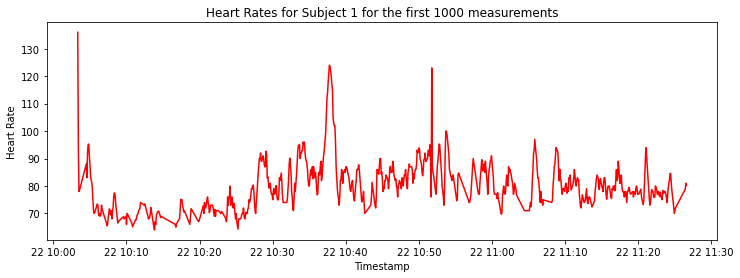

In [22]:
times_off, times_stand, times_sit, times_lying,\
        hr_off, hr_stand, hr_sit, hr_lying = read_hr_acti(1)
# read the data from actigraph.txt 

times_raw = times_stand
hr_raw = hr_stand
acti_display(times_raw,hr_raw)


Plot the first 1000 heart rate measurements over time for subject 1 with lying position :

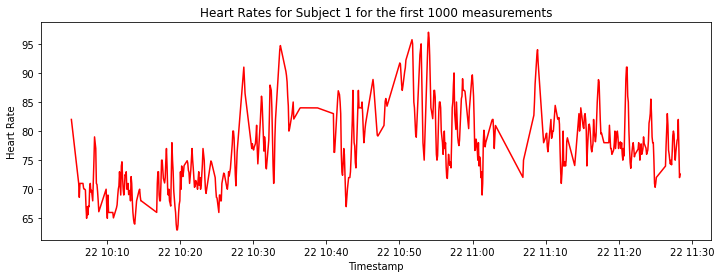

In [23]:
times_off, times_stand, times_sit, times_lying,\
        hr_off, hr_stand, hr_sit, hr_lying = read_hr_acti(1)

times_raw = times_sit
hr_raw = hr_sit
acti_display(times_raw,hr_raw)


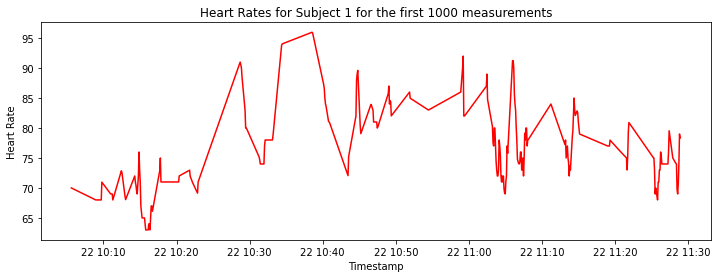

In [24]:
times_off, times_stand, times_sit, times_lying,\
        hr_off, hr_stand, hr_sit, hr_lying = read_hr_acti(1)


times_raw = times_lying
hr_raw = hr_lying
acti_display(times_raw,hr_raw)


Plot the first 1000 heart rate measurements over time for subject 1 with no position recorded:

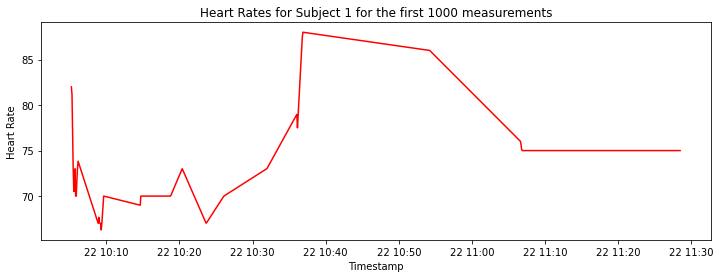

In [25]:
times_off, times_stand, times_sit, times_lying,\
        hr_off, hr_stand, hr_sit, hr_lying = read_hr_acti(1)


times_raw = times_off
hr_raw = hr_off
acti_display(times_raw,hr_raw)